In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Fraud_check (1).csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
df.duplicated().sum()

0

## Encoding

In [11]:
import category_encoders as ce

In [24]:
Ordinal = ce.OrdinalEncoder(cols = ['Undergrad','Marital.Status','Urban'])
Ordinal

OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])

In [25]:
df1 = Ordinal.fit_transform(df)

In [26]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2


In [27]:
Taxable_Income = []
for value in df1["Taxable.Income"]:
    if value<= 30000:
        Taxable_Income.append("Risky")
    else:
        Taxable_Income.append("Good")

df1["Taxable_Income"]= Taxable_Income

In [28]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


In [30]:
df1 = df1.drop(columns='Taxable.Income')
df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,1,1,50047,10,1,Good
1,2,2,134075,18,1,Good
2,1,3,160205,30,1,Good
3,2,1,193264,15,1,Good
4,1,3,27533,28,2,Good


In [57]:
df1.Taxable_Income.unique()

array(['Good', 'Risky'], dtype=object)

In [58]:
df1.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [36]:
x = df1.iloc[:,:-1]
y = df1['Taxable_Income']

In [37]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [38]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_Income, Length: 600, dtype: object

## Splitting the data

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Using C5(Entropy Criteria)

In [45]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth= 8)

In [46]:
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.81      0.93      0.87        97
       Risky       0.22      0.09      0.12        23

    accuracy                           0.77       120
   macro avg       0.52      0.51      0.50       120
weighted avg       0.70      0.77      0.72       120



In [47]:
print('Training accuracy:', dt.score(xtrain,ytrain))
print('Testing Accuracy:', dt.score(xtest,ytest))

Training accuracy: 0.8395833333333333
Testing Accuracy: 0.7666666666666667


## Visualization

In [48]:
plt.rcParams['figure.figsize']= (10,10)
plt.rcParams['figure.dpi']= 450

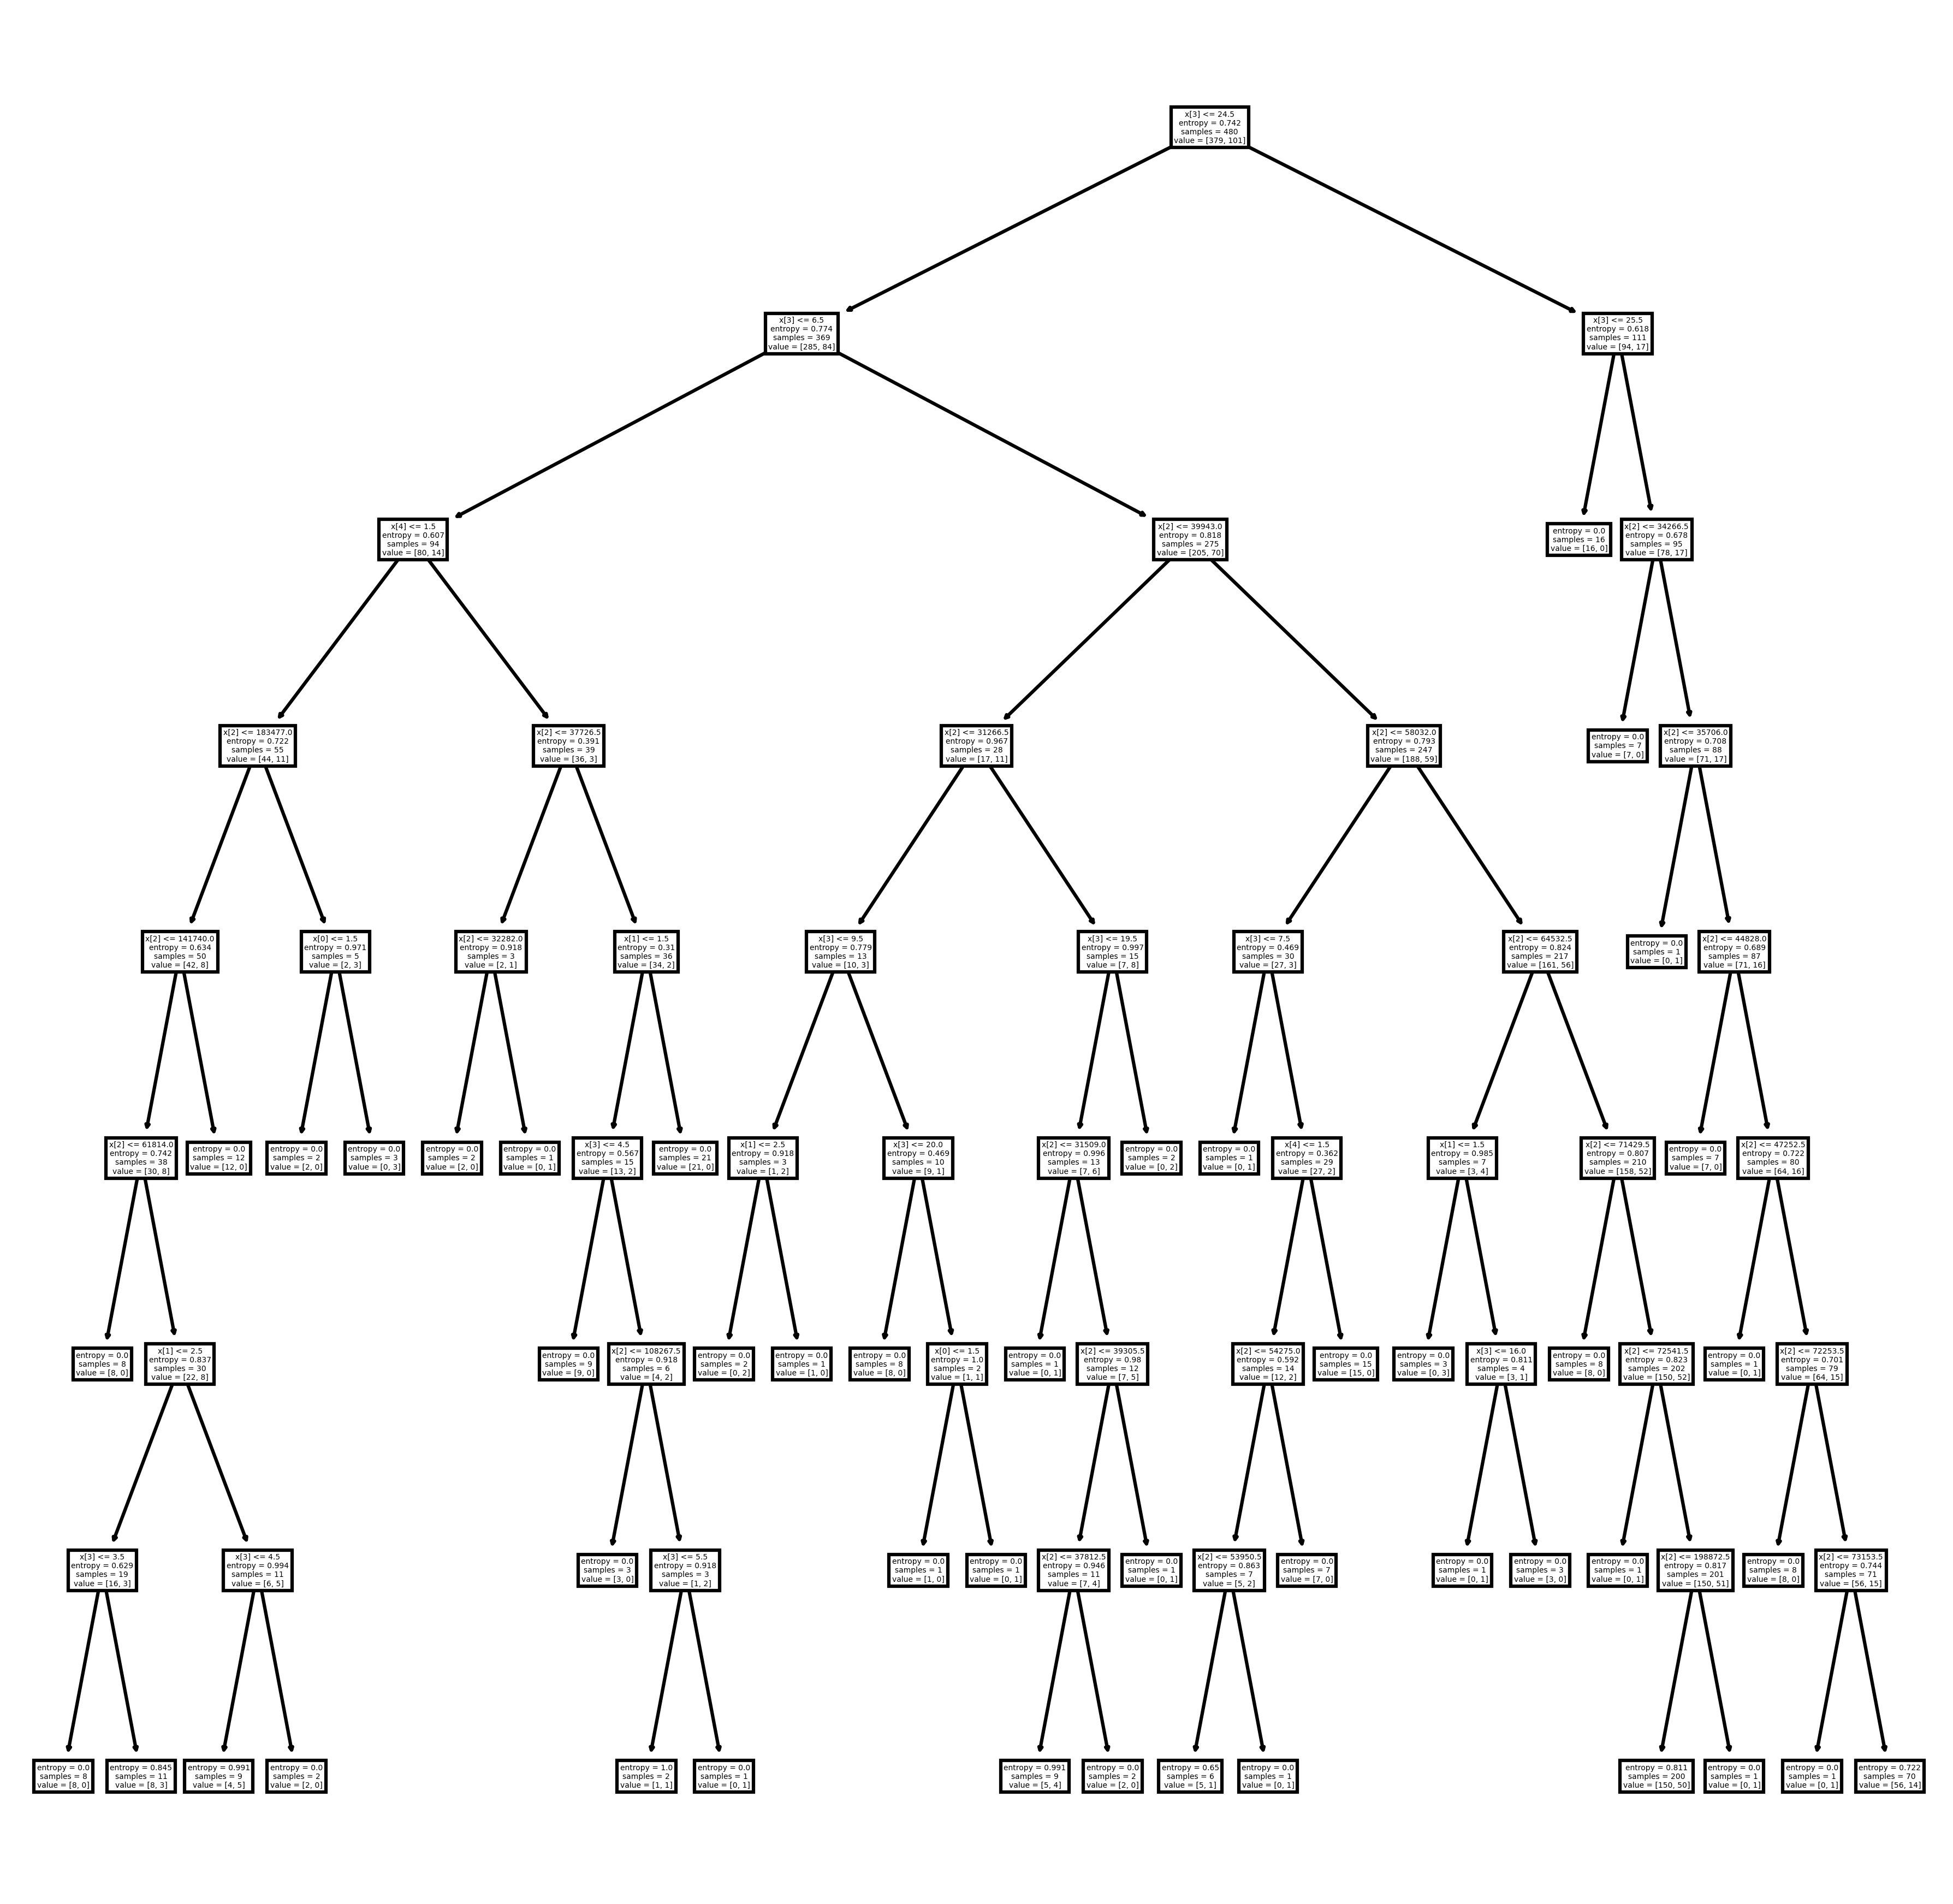

In [49]:
tree.plot_tree(dt)
plt.show()

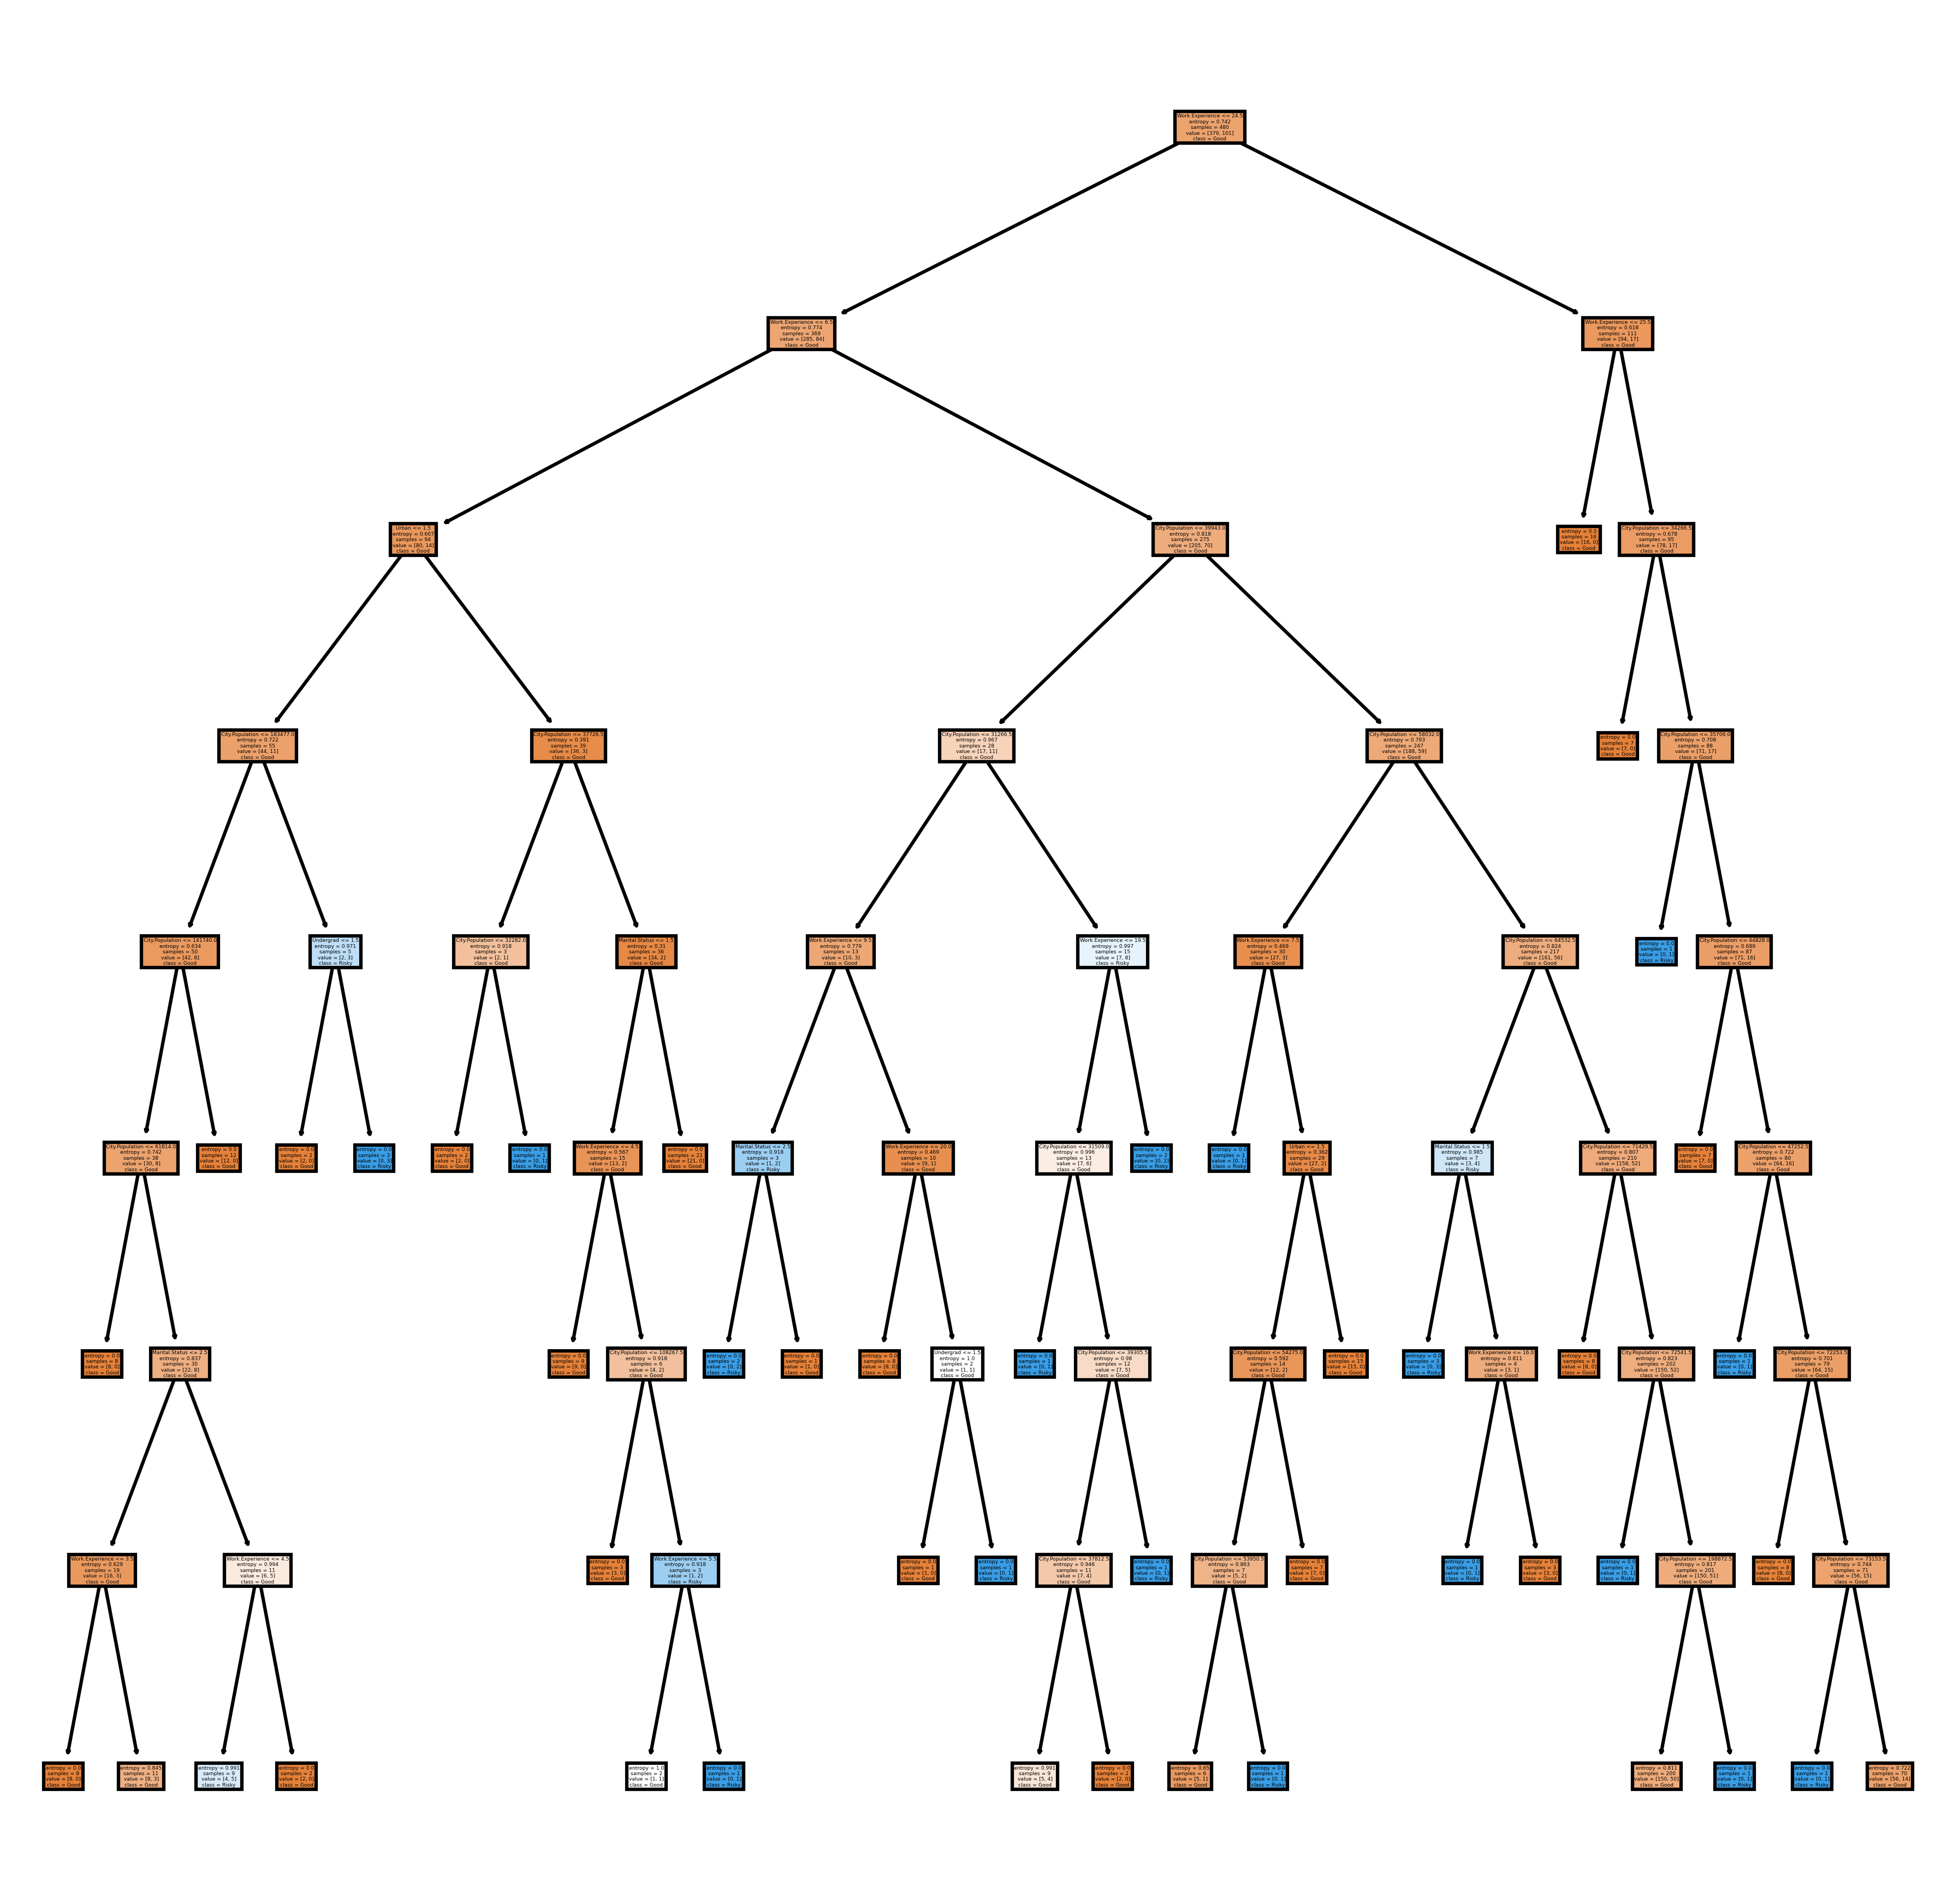

In [51]:
tree.plot_tree(dt,feature_names= x.columns,class_names=df1['Taxable_Income'].unique(),filled=True)

plt.show()

In [55]:
dt.feature_importances_

array([0.06205379, 0.10194613, 0.50367613, 0.2931652 , 0.03915875])

### Using CART(Gini Criteria)

In [52]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(xtrain,ytrain)

ypred = DT.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.81      0.73      0.77        97
       Risky       0.19      0.26      0.22        23

    accuracy                           0.64       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.69      0.64      0.66       120



In [54]:
print('Training accuracy: ', DT.score(xtrain,ytrain))
print('Testing Accuracy: ', DT.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.6416666666666667


In [56]:
DT.feature_importances_

array([0.07556549, 0.09389604, 0.55566524, 0.19925346, 0.07561977])